In [1]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')
import hvplot.pandas

In [2]:
sales_df = pd.read_excel('sales2.xlsx', sheet_name='Sheet1')
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015


In [3]:
sales_df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
year             0
dtype: int64

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
pd.DataFrame(sales_df.groupby('City').sum()['Profit']).sort_values('Profit', ascending=False)

,Profit
City,
New York City,62036.9837
Los Angeles,30440.7579
Seattle,29156.0967
San Francisco,17507.3854
Detroit,13181.7908
...,...
Chicago,-6654.5688
Lancaster,-7239.0684
San Antonio,-7299.0502


In [6]:
if 'data' not in pn.state.cache.keys():

    sales_df = pd.read_excel('sales2.xlsx', sheet_name='Sheet1')

    pn.state.cache['data'] = sales_df.copy()

else: 

    sales_df = pn.state.cache['data']


In [7]:
# Make DataFrame Pipeline Interactive
sales_df = sales_df.interactive()

In [8]:
# Define Panel widgets
year_slider = pn.widgets.IntSlider(name='Year slider', start=2014, end=2018, step=1, value=2014)
year_slider

IntSlider(end=2018, name='Year slider', start=2014, value=2014)

In [9]:
yaxis_sales = pn.widgets.RadioButtonGroup(
    name='y axis',
    options=['Sales', 'Profit',],
    button_type= 'success'
)
yaxis_sales

RadioButtonGroup(button_type='success', name='y axis', options=['Sales', 'Profit'], value='Sales')

In [10]:
# state = ['New York City','Los Angeles','Seattle','San Francisco','Detroit']
Sales_pipeline = (
    sales_df[
        (sales_df.year <= year_slider)
    ]
    .groupby(['Country', 'year'])[yaxis_sales].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [11]:
Sales_pipeline

In [12]:
sales_plot = Sales_pipeline.hvplot(x= 'year',by='Country', y=yaxis_sales,line_width=2, title="Sales Trends",size=20)
sales_plot

In [13]:
Scatterplot_pipeline = (
    sales_df[
        (sales_df.year <= year_slider)
    ]
    .groupby(['year', 'Discount'])['Quantity'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [14]:
Scatterplot_pipeline

In [15]:
Scatterplot_Sales = Scatterplot_pipeline.hvplot(x='Discount', 
                                                                y='Quantity',  
                                                                
                                                                size=60, kind="scatter", 
                                                                alpha=0.7,
                                                                legend=False, 
                                                                height=300, 
                                                                width=400)
Scatterplot_Sales

In [16]:
bar_pipeline = (
    sales_df[
        (sales_df.year <= year_slider)
    ]
    .groupby(['Category','year'])[yaxis_sales].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [17]:
bar_pipeline

In [18]:
bar_pipeline_plot = bar_pipeline.hvplot(kind='barh', 
                                                     x='Category', 
                                                     y=yaxis_sales, 
                                                     title='Top category sales')
bar_pipeline_plot

In [19]:
from matplotlib.pyplot import pie, axis, show
import matplotlib.pyplot as plt

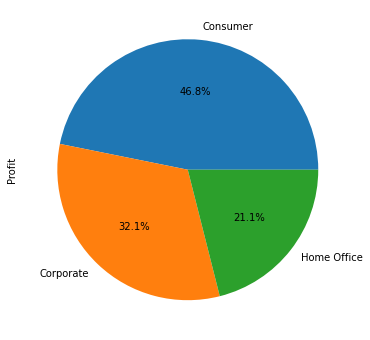

In [20]:
df = pd.read_excel('sales2.xlsx', sheet_name='Sheet1')
x = df.Profit.groupby(df.Segment).sum().plot(kind='pie',figsize=(6,6),autopct='%1.1f%%')
filename = 'piee'
plt.savefig(filename+'.png', facecolor='White')

In [21]:
#Layout using Template
temp = pn.template.FastListTemplate(
    title='Super Store Analysis', 
    sidebar=[pn.pane.Markdown("# Sales Dashboard"), 
             pn.pane.Markdown("#### -From the analysis we can note that:  (- There's an increase sales over the years.)      (- There's no much correlation between quatity order and discount price.)     (- Product under Technology category have higher sales and profit.)     (- Lastly Product under consumers segment also have high profit.)"), 
             pn.pane.PNG('saless.png', sizing_mode='scale_both'),
             pn.pane.Markdown("## Settings"),   
             year_slider],
    main=[pn.Row(pn.Column(yaxis_sales, 
                           sales_plot.panel(width=500), margin=(0,25)), 
                 'piee.png'), 
          pn.Row(Scatterplot_Sales.panel(width=500), 
                 pn.Column(yaxis_sales, bar_pipeline_plot.panel(width=450)))],
    accent_base_color="#88afd8",
    header_background="#88d8b0",
)
temp.show()
# temp.servable();

Launching server at http://localhost:51159
